# Logistinen regressio: materiaali

Tämän kerran tilaisuudessa tutustumme logistisen regression malliin. Logistista regressiota käytetään data-analyysissä luokitellun muuttujan ennustamiseen: Tarkastellaan esimerkkinä vaikkapa tilannetta, jossa vakuutusyhtiö tarjoaa asiakkaalle vakuutuksen liikenneonnettomuuden varalta. Vakuutuksen hinnan määrittämiseksi olisi hyvä, jos vakuutusyhtiö pystyisi arvioimaan paitsi potentiaalisen onnettomuuden kustannukset, myös todennäköisyyden, jolla asiakas joutuu onnettomuuteen. Jälkimmäisen arvioimiseksi käytetään logistista regressiota. 

Tilaisuus on jaettu kahteen osaan: ensimmäisessä osassa käydään läpi valmis malli ja osan tarkoituksena on saada käsitys siitä, miten logistinen regressio toimii. Toisessa osassa pääsee kokeilemaan itse mallin rakentamista. Vaikka käytetyt datasetit ovat aitoja, molemmat tilaisuudessa käytetyt esimerkit ovat keksittyjä. Ne antavat toivottavasti hieman kuvaa siitä, millaista data scientistin työ on. Materiaalit on rakennettu niin, että mallia käsitellään mahdollisimman pitkälle käytännön esimerkin kautta ja teorian osuus on jätetty pieneksi. 

Otetaan lähtökohdaksi seuraavanlainen tilanne: Sinut on palkattu data scientistiksi konsulttiyritykseen. Ensimmäisen tehtävän kohdalla olet tuore työntekijä, projekti on jo olemassa ja data tulee annettuna. Toisen tehtävän kohdalla olet jo hieman päässyt vaikuttamaan ja mahdollisesti jo oppinut itsekin aiemmista virheistä. Molemmat tehtävät ratkaistaan käyttämällä logistista regressiota.

# Ensimmäinen tehtävä: pankin lainapäätösten ennustaminen

Ensimmäinen asiakkaasi on amerikkalainen pankki, joka tarjoaa asiakkailleen asuntolainoja. Asuntolainapäätöstä tehdessä pankin työntekijä arvioi asiakkaan luottokelpoisuuden. Luottokelpoisuuden arvioimiseksi työntekijällä on käytettävissä tietoja asiakkaan muista lainoista. Työntekijä on myös tavannut kaikki asiakkaat.

Pankissa ollaan kuultu, että lainapäätösprosessin voi automatisoida teköälyn avulla. Sinun tehtäväsi on toteuttaa automatisointi. Tehtävän toteuttamiseksi sinulle on toimitettu dataa aiemmista lainapäätöksistä. Datassa on tietoa menneistä lainapäätöksistä, näiden asiakkaiden muista lainoista, luottokelpoisuudesta sekä demograafista dataa asiakkaasta.

## Lyhyt katsaus teoriaan

Ennen kun käydään varsinaisen tehtävän kimppuun, otetaan lyhyt katsaus teoriaan. Logistinen regressio on siis luokittelumalli, jonka avulla voidaan arvioida, millä todennäköisyydellä asiakkaalle myönnetään asuntolaina. Matemaattisesti tätä todennäköisyyttä arvioidaan seuraavan yhtälön avulla

\begin{equation}
\Pr(Y = 1| X) = \frac{\exp(\beta_0 + \beta_1 X)}{1 + \exp(\beta_0 + \beta_1 X)}  \tag{1}
\end{equation}

Selitettävä eli endogeeninen muuttuja $ Y $ kuvaa pankin lainapäätöstä ja saa arvon $ 1 $, jos asiakkaalle myönnetään laina ja arvon $ 0 $, jos lainaa ei myönnetä. Eksogeeninen eli selittävä muuttuja $ X $ kuvaa jonkin tekijän, esimerkiksi asiakkaan sukupuolen, ihonvärin tai luottorekisterimerkinnän vaikutusta pankin lainapäätökseen. Yhtälössä (1) selittäviä muuttujia on vain yksi, todellisuudessa selittäviä tekijöitä on luonnollisesti monta. Idea on kuitenkin sama ja on helpoin hahmottaa yhden muuttujan tapauksessa.

$ \beta_0 $ ja $ \beta_1 $ arvioidaan eli estimoidaan mallin avulla. Vakio $ \beta_0 $ mittaa hyväksytyn lainapäätöksen todennäköisyyttä sillon, kun muuttujan $ X $ arvo on $ 0 $. Kerroin $ \beta_1 $ mittaa muuttujan $ X $ vaikutusta lainapäätökseen. Kertoimille voidaan esittää hyvinkin tarkka tulkinta, mutta koska logistinen regressio on epälineaarinen malli, tämä vaatii hieman ylimääräistä aivojumppaa. Kertoimien tulkintaan palataan seuraavalla kerralla lineaarisen regression tapauksessa, jossa tulkinta on suoraviivaisempaa.

## Data 

Palatkaamme itse tehtävään. Sinulle on toimitettu datasetti sekä seuraava, kieltämättä melko sekava englanninkielinen lista muuttujista:

Dependent variable:
* $ approve = 1 $ if action $== 1$ or $ 2 $


Independent variables:
* $ married = 1 $ if applicant married
* $ dep $ number of dependents
* $ pubrec = 1 $ if filed bankruptcy
* $ hrat $ housing exp, $ \% $ total inc
* $ obrat $ other oblgs,  $ \% $ total inc
* $ cosign $ is there a cosigner
* $ unem $ unemployment rate by industry
* $ vr = 1 $ if tract vac rte $ > $ MSA med
* $ sch = 1 $ if $ > 12 $ years schooling
* $ male = 1 $ if applicant male
* $ mortlat1 $ one or two late payments
* $ mortlat2 > 2 $ late payments
* $ chist = 0 $ if accnts deliq. $ >= 60 $ days
* $ loanprc = amt / price $
* $ white = 1 $ if applicant white

Käytämme datankäsittelyyn Pandas-kirjastoa. Keskitymme tässä tilaisuudessa malliin ja datan tulkintaan, halukkaat voivat palauttaa teknisiä yksityiskohtia mieleensä edellisen tilaisuuden materiaaleista. Haetaan ensin Pandas-kirjasto ja ladataan data csv-tiedostosta Pandas-datakehykseen (data frame). 

In [1]:
import pandas as pd
# datasetti yläkansion data alla. Jos datasettisi on samassa kansiossa tämän tiedoston kanssa, muokkaa
# allaolevassa koodinpätkässä sulkujen sisällä tekstiä poistamalla osa "../data/"
df = pd.read_csv("../data/loanapp.csv")

Tarkastellaan ensin dataa, jotta saadaan hieman käsitystä siitä mitä olemme tekemässä. Seuraava koodi tulostaa näytölle datakehyksen viisi ensimmäistä riviä. Vastaavasti voit tulostaa viisi viimeistä riviä komennolla `df.tail()`

In [2]:
df.head()

,married,dep,pubrec,hrat,obrat,cosign,unem,vr,sch,male,approve,mortlat1,mortlat2,chist,loanprc,white
0,0.0,0.0,0,17.63,34.5,0,3.2,1,1,NaN,1,0,0,1,0.754237,1
1,1.0,1.0,0,22.54,34.1,0,3.2,1,1,1.0,0,0,0,1,0.800000,1
2,0.0,0.0,0,19.00,26.0,0,3.9,0,1,1.0,1,0,0,1,0.895105,1
3,1.0,0.0,1,24.00,37.0,0,3.1,1,1,1.0,1,0,0,0,0.600000,1
4,1.0,0.0,0,25.10,32.1,0,4.3,0,0,1.0,1,0,0,1,0.895522,1


Datasetti koostuu $ 1988 $ havainnosta ja $ 16 $ muuttujasta ja se on meillä työtilassa Pandas-datakehyksenä. Tämä voidaan todentaa ajamalla seuraava koodinpätkä

In [3]:
print(df.shape)
print(type(df))

(1988, 16)
<class 'pandas.core.frame.DataFrame'>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 16 columns):
married     1985 non-null float64
dep         1985 non-null float64
pubrec      1988 non-null int64
hrat        1988 non-null float64
obrat       1988 non-null float64
cosign      1988 non-null int64
unem        1988 non-null float64
vr          1988 non-null int64
sch         1988 non-null int64
male        1973 non-null float64
approve     1988 non-null int64
mortlat1    1988 non-null int64
mortlat2    1988 non-null int64
chist       1988 non-null int64
loanprc     1988 non-null float64
white       1988 non-null int64
dtypes: float64(7), int64(9)
memory usage: 248.6 KB


Palatkaamme tehtävänantoon. Tavoitteenamme oli toistaa pankin lainapäätösprosessi mahdollisimman tarkasti käyttämällä hyväksemme tekoälyä ja dataa menneistä lainapäätöksistä. Datasetissä menneitä lainapäätöksiä kuvaa muuttuja $ approve $, joten tutustumme tähän seuraavaksi tarkemmin. Allaoleva koodinpätkä on hieman monimutkainen, mutta keskitytään tällä kertaa sen antamaan tulosteeseen.

In [5]:
# rakennetaan taulukko lainapäätöksistä niin, että se tulostuu siistissä muodossa
# valitaan datakehyksestä muuttuja approve ja lasketaan nollien ja ykkösten määrä 
taulukko = pd.crosstab(index = df['approve'], columns = 'count')

# nimetään taulukon osat niin, että lopputulos on hyvin ymmärrettävissä
taulukko.columns = ['lukumäärä']
taulukko.index = ['hylätty', 'hyväksytty']

# tulostetaan vielä valmis taulukko
taulukko

,lukumäärä
hylätty,244
hyväksytty,1744


Tästä näemme heti, että hyväksyttyjä päätöksiä on huomattavasti enemmän kuin hylättyjä. Luokat ovat silloin keskenään epätasapainossa (engl. unbalanced classes). Tämä tekee päätösten ennustamisesta haastavampaa.

Datan hahmottaminen helpottuu monesti, kun sitä visualisoi eli piirtää kuvia. Piirretäänkin seuraavaksi kuva lainapäätöksistä. Datan visualisoimiseen käytetään seaborn and matplotlib -kirjastoja.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

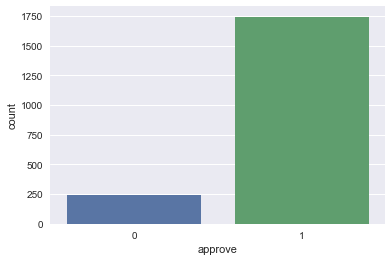

In [7]:
sns.countplot(x = 'approve', data = df)
plt.show()

## Harjoitusdata ja testidata

Tehtävän tavoitteena opettaa malli, joka toistaa pankin työntekijöiden lainanantopäätöksen teköälyn avulla. Mallin opettamiseen käytetään dataa aiemmista lainapäätöksistä. Mallin kehittämisen lisäksi on kuitenkin tärkeää varmistaa, että malli toimii halutulla tavalla. Tätä tarkoitusta varten datasetti jaetaan kahteen osaan: harjoitusdataan ja testidataan. Sekoitetaan datasetti vielä ennen jakamista siltä varalta, että data on järjestetty datakehyksessä. 

Mallin kehittämiseen käytetään sklearn-kirjastoa, jossa on monipuoliset työkalut analyysiin. Seuraava koodi on taas hieman monimutkaisempi ja tässä vaiheessa tärkeintä on ymmärtää asia yleisellä tasolla

In [8]:
from sklearn.utils import shuffle

In [9]:
# tiputetaan havainnot joissa on puuttuvia arvoja
df = df.dropna(axis = 0)

# tarkastetaan, että meille jää tarpeeksi havaintoja
print("Havaintojen määrä: ", df.approve.size)

# sekoitetaan datakehys
df = shuffle(df)

# erotetaan lainapäätöstä kuvaava muuttuja datakehyksestä
Y = df[['approve']].values.ravel()   # 
X = df.drop(['approve'], axis = 1)   # axis = 1 valitsee sarakkeen

# muodostetaan harjoitus- ja testidata
Ytrain = Y[:int(0.8*len(Y))]
Ytest = Y[int(0.8*len(Y)):]

Xtrain = X[:int(0.8*len(Y))]
Xtest = X[int(0.8*len(Y)):]


Havaintojen määrä:  1970


Tehdään pistokoe, jonka avulla varmistetaan, että kaikki on mennyt oikein. Tulostetaan testijoukosta toteutuneiden lainapäätösten vektorista kolme ensimmäistä arvoa. Huomaathan, että tulostetut arvot vaihtelevat hieman se perusteella, miten datasetti sattuu jakautumaan sen jälkeen, kun se on sekoitettu.

In [10]:
Ytest[:3]

array([1, 1, 1])

## Logistinen regressio

Opetetaan seuraavaksi pankin lainapäätökset toistava malli. Käytetään jälleen apuna sklearn-kirjastoa ja haetaan sieltä analyysivälineet logistisen regression käsittelyyn.

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression();

Sovitetaan ensin malli harjoitusdatalla eli estimoidaan mallin (1) $ \beta $-kertoimien arvot. 

In [12]:
logreg.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Seuraavaksi toistetaan lainanantopäätöksiä testidatan avulla. Nämä ovat todellisia päätöksiä, joten meillä on tieto siitä, mitä pankin työntekijä on oikeasti päättänyt. Näin voimme verrata malln tekemää päätöstä pankin työntekijän tekemään päätökseen. Aloitetaan valitsemalla kolme ensimmäistä arvoa testidatasta ja generoidaan niille lainapäätös mallin avulla.

In [13]:
logreg.predict(Xtest[0:3])

array([1, 1, 1])

Katsotaan datasta, minkälaisia hakijoita testijoukkoon valikoitui

In [14]:
Xtest[:3]

,married,dep,pubrec,hrat,obrat,cosign,unem,vr,sch,male,mortlat1,mortlat2,chist,loanprc,white
533,0.0,0.0,0,18.0,33.0,0,3.1,1,1,1.0,0,0,1,0.793651,1
963,0.0,0.0,0,23.0,34.0,0,2.0,0,1,0.0,0,0,1,0.801653,1
889,1.0,0.0,0,13.0,17.0,0,3.6,0,1,1.0,0,0,1,0.311927,1


Verrataan mallin tekemiä lainapäätöksiä pankin työntekijöiden tekemiin

In [15]:
Ytest[:3]

array([1, 1, 1])

Samalla idealla voidaan tehdä päätöksiä erilaisten asiakkaiden lainojen hyväksymisestä. Generoidaan päätökset koko testijoukolle.

In [16]:
pred = logreg.predict(Xtest)

## Mallin toimintakyky: tarkkuus ja konfuusiomatriisi

Seuraavaksi tarkastellaan sitä, miten tarkasti malli pystyy toistamaan pankin työntekijöiden päätöksiä. Tätä varten lasketaan datasta mallin tarkkuus (accuracy)

In [17]:
score = logreg.score(Xtest, Ytest)
score

0.8984771573604061

Huomataan, että mallin tarkkuus on melko hyvä. Jälleen tarkka luku riippuu hieman siitä, mihin järjestykseen data on sattunut asettumaan testissä. Tätä satunnaisuutta voi tasata hieman jakamalla data testijoukkoon useaan otteeseen. Palataan tähän (toivottavasti) seuraavassa tilaisuudessa.

Tarkkuuden määrittämisen lisäksi on hyvä tarkastaa, mitä pääätöksiä malli on toistanut oikein. Tässä ns. konfuusiomatriisi on hyödyllinen apuväline. Konfuusiomatriisi on järjestetty seuraavalla tavalla

|              | Mallin päätös |
------------------------------|--------------|---------------|--------------
                              |              | *hylätty*     | *hyväksytty*
**Pankin työntekijän päätös** | *hylätty*    | TN            | FP 
                              | *hyväksytty* | FN            | TP
                              
missä
* TN = mallin oikein luokittelemat negatiiviset päätökset
* TP = mallin oikein luokittelemat positiiviset päätökset
* FN = mallin virheellisesti negatiiviseksi luokittelema päätös
* FP = mallin virheellisesti positiiviseksi luokittelema päätös

Tulostetaan mallin konfuusiomatriisi. Jälleen tarkka tulos on arvan varassa, mutta malli ennustaa hyvin nimenomaan hyväksyttyjä lainapäätöksiä, joita datassa on paljon. Tämä johtuu siitä, että hyväksyminen on tällöin datassa todennäköinen tulema. Malli arvaa mielellään oikein, joten myös hyväksyy mielellään.

In [18]:
from sklearn import metrics

cmat = metrics.confusion_matrix(Ytest, pred)
cmat

array([[  5,  35],
       [  5, 349]])

Konfuusiomatriisia voidaan visualisoida lämpökartan avulla. Lämpökartta erottelee eri väreillä tai värisävyillä erilaiset päätökset.

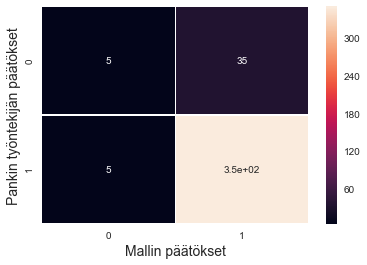

In [19]:
sns.heatmap(cmat, annot = True, linewidths = .2)

plt.ylabel('Pankin työntekijän päätökset', fontsize = 14)
plt.xlabel('Mallin päätökset', fontsize = 14)
plt.show()

## Mallin toimintakyky: ROC-käyrä ja alue käyrän alapuolella (AUC)

Epätasapainoisen luokittelumallin estimoiminen voi olla haastavaa, mutta mallin rakentamisen pohjaksi on olemassa hyviä menetelmiä. Kaavan (1) mukaan logistinen regressio estimoi todennäköisyyden sille, että havainto kuuluu johonkin luokkaan. Käytännössä luokittelu tapahtuu niin, että jos kaavan (1) estimoima todennäköisyys on tarpeeksi suuri, havainto luokitellaan luokkaan $ 1 $. Muussa tapauksessa se luokitellaan luokkaan $ 0 $. Kutsutaan tätä todennäköisyyttä vaikka kynnysarvoksi (cutoff value, threshold).

Ylläolevassa analyysissa olimme luokitelleet muuttujat kirjaston määrittämä valmiin kyynysarvon perusteella. Näin päädyimme malliin, joka toistaa pankin työntekijöiden lainapäätökset melko tarkasti. Mallimme kuitenkin hyväksyi monta sellaista lainaa, jonka pankin työntekijä olisi hylännyt. Tästä voi aiheutua pankille kustannuksia luottotappioiden muodossa. 

Kynnysarvoa varioimalla voidaan joskus päästä parempaan lopputulokseen, esimerkiksi jos haluamme mallimme keskittyvän nimeomaan seulomaan tarkasti asiakkaat, joille pankki ei halua missään tapauksessa myöntää lainaa. Tätä ongelmaa voidaan pohtia ns. ROC-käyrän avulla, jonka koko nimeä ei varmasti juuri kukaan data scientist muista googlaamatta. ROC-käyrän laskemista varten tarvitaan vielä seuraavat määritelmät:
* Herkkyys eli True Positive Rate
\begin{equation}
TPR =  \frac{oikeat \  positiiviset}{mallin \ antamat \ positiiviset} = \frac{TP}{TP + FP}.
\end{equation}
* Väärät hälytykset eli False Positive Rate
\begin{equation}
FPR = \frac{väärät \ positiiviset}{kaikki \ negatiiviset} = \frac{FP}{FP + TN} = 1 - \underset{tarkkuus}{\underbrace{\frac{TN}{FP + TN}}}.
\end{equation}

ROC-käyrä piirtää herkkyyttä väärien hälytysten funktiona ja saadaan varioimalla kynnysarvoa.

ROC-käyrän alapuolinen alue mittaa hyvin mallin toimintakykyä ja sillä on seuraavat ominaisuudet
* AUC = $ 1 $: malli luokittelee kaikki havainnot oikein kynnysarvosta riippumatta. Malli hyväksyy pankin työntekijän hyväksymän lainan todennäköisyydellä $ 1 $ ja mallin työntekijän hylkäämän lainan todennäköisyydellä $ 0 $.
* AUC = $ 0,5 $: puhdas arvaus. Malli käytännössä heittää lanttia oikeasta vastauksesta.
* AUC = $ 0 $: malli ei koskaan osu oikeaan millään kynnysarvolla. Tätä ei käytännössä tapahdu, joten jos jotain tällaista tulee vastaan, on ehkä syytä tarkastaa analyysi ja käydä koodi läpi vielä kerran.

Tätä voidaan havainnollistaa graafisesti seuraavan kuvan avulla. Matemaattisesti valveutuneet huomaavat, että neliön pinta-ala on $ 1 $ ja puolikkaan neliön $ 0,5 $.

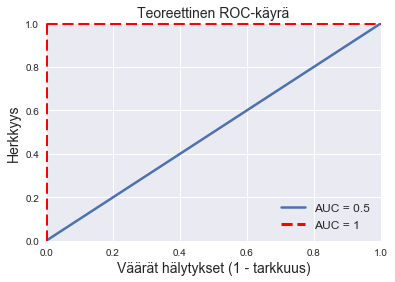

In [20]:
plt.plot([0, 1], [0, 1], label = "AUC = 0.5", linewidth = 2.5)
plt.plot([0, 0], [0, 1], linestyle='--', color = 'red', label = "AUC = 1", linewidth = 3)
plt.plot([0, 1], [1, 1], linestyle='--', color = 'red', linewidth = 3)
plt.xlim([0.0,1.0]), plt.ylim([0.0,1.0])

plt.title('Teoreettinen ROC-käyrä', fontsize = 14)
plt.xlabel('Väärät hälytykset (1 - tarkkuus)', fontsize = 14)
plt.ylabel('Herkkyys', fontsize = 14)
plt.legend(loc = 4, fontsize = 12)

plt.show()

Yleisemmin malliin on syytä olla erittäin tyytyväinen, jos AUC on n. 0,9 ja 0,8 on vielä täysin hyväksyttävä arvo. 0,7:n mallia voi vielä käyttää, mutta sen alapuolella on syytä olla varovainen.

Piirretään mallin ROC-käyrä.

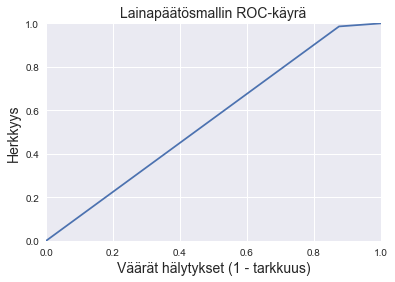

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(Ytest, pred)

plt.plot(fpr, tpr); plt.xlim([0.0,1.0]); plt.ylim([0.0,1.0])
plt.title('Lainapäätösmallin ROC-käyrä', fontsize = 14)
plt.xlabel('Väärät hälytykset (1 - tarkkuus)', fontsize = 14)
plt.ylabel('Herkkyys', fontsize = 14)

plt.show()

Lasketaan vielä ROC-käyrän alapuolinen alue, jotta saadaan mittari mallin toimintakyvylle. AUC:n tarkka arvo vaihtelee hieman datasetin asettumisen mukaan, mutta tästä nähdään, että malli ei pysty tyydyttävästi toistamaan pankin työntekijöiden tekemiä lainapäätöksiä.

In [22]:
metrics.roc_auc_score(Ytest, pred)

0.5554378531073446

## Diskriminaatio ja data science

Mallissa on myös toinen ongelma: data ja käytettävät muuttujat. Jos tarkastelee käytettäviä muuttujia, mukana on demograafisia tekijöitä kuten sukupuoli tai ihonväri. Tilastollisen analyysin menetelmiä käyttämällä voidaan todistaa tieteellisesti, että pankin työntekijät ovat diskriminoineet ei-valkoisia lainanhakijoita. Piirretään asiaa havainnollistava kuva

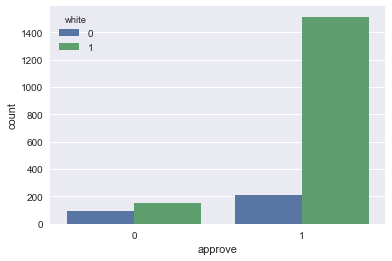

In [23]:
sns.countplot(x = 'approve', hue = 'white', data = df)
plt.show()

On myös hyvä huomata, että tehtävänannossa pyydetään toistamaan pankin työntekijöiden lainanantopäätökset. Onkin syytä kysyä, onko tämä järkevä kriteeri, vai olisiko syytä keskittyä myöntämään laina asiakkaille, joiden voi odottaa maksavan takaisin. Tätä kysymystä varten tarvittaisiin dataa asiakkaiden lainojen takaisinmaksusta.

Viimeisenä huomiona mainittakoon, että esimerkin pohjana olevaa datasettiä ei ole käytetty pohjana data science -projektissa vaan sen pohjalta on aiemmin tehty tieteellinen tutkimus syrjinnästä. Data on kuitenkin oikeaa ja syrjintää on esiintynyt lainapäätöksissä. Jos vastaava malli rakennettaisiin päättelemään asiakkaan maksukykyä ja mallille ei annettaisi muita kuin maksukykyä selittäviä tekijöitä, voidaan tässä nimenomaisessa tilanteessa päästä oikeudenmukaisempaan lopputulemaan.

# Kerta kiellon päälle: lisämateriaalia

Materiaali on venynyt jo paljon aiottua pidemmäksi, mutta en malta olla lisäämättä vielä yhtä lisähuomiota. Yksi logistisen regressiomallin vahvuuksista on, että kaavan (1) $ \beta $-kertoimet kertovat, kuinka paljon mikäkin tekijä vaikuttaa päätökseen. Epälineaarisen mallin tapauksessa kertoimien tulkinta on oma lukunsa, mutta katsotaanpa nopeasti, miten ne saa esiin mallista.

Alotetaan ajamalla regressiomalli koko datalle

Kertoimet saa esille seuraavalla komennolla

In [24]:
logreg.coef_

array([[ 0.64084691, -0.11365808, -1.2796842 ,  0.01788707, -0.05440497,
         0.41766186, -0.03612361, -0.30370568,  0.16123401, -0.03470286,
        -0.18770144, -0.42593499,  0.94976657, -1.1545013 ,  1.02468162]])

Kaivetaan vielä esiin muuttujien nimet mallin syövereistä, jotta tiedetään, mitä katsotaan

In [25]:
df.columns

Index(['married', 'dep', 'pubrec', 'hrat', 'obrat', 'cosign', 'unem', 'vr',
       'sch', 'male', 'approve', 'mortlat1', 'mortlat2', 'chist', 'loanprc',
       'white'],
      dtype='object')

Vertailemalla näitä kahta saa jo hieman käsitystä siitä, mikä tekijä vaikuttaa positiivisesti lainansaantiin ja mikä negatiivisesti. Myös kuvien piirtäminen auttaa.